In [4]:
import numpy as np
import pandas as pd

# Preprocessing


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

updates = pd.read_csv("train_updates_20220929.csv")

 Definiram-se os dados de teste e treino e, ainda, se definiu dados de treino atualizados, de modo a corrigir-se alguns dos dados de treino.

In [3]:
train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [5]:
updates

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [5]:
print(f"Entries to update (num_rows): {updates['pH'].shape}")

mask = updates["pH"].isna()

to_delete = updates.loc[mask,:]
to_change = updates.loc[-mask,:]

print(f"Entries to delete (shape): {to_delete.shape}")
print(f"Entries to change (shape): {to_change.shape}")

Entries to update (num_rows): (2434,)
Entries to delete (shape): (2409, 5)
Entries to change (shape): (25, 5)


Verificou-se o número de dados para deletar e para modificar.

In [6]:
# First, change rows with data arrangement errors
train.loc[to_change.index, ["pH", "tm"]] = updates.loc[to_change.index, ["pH", "tm"]]

In [7]:
# Next, remove rows with data issues
print(f"Number of entries (original data): {train.shape[0]}")
train_cut = train.drop(to_delete.index)
print(f"Number of entries (after cut): {train_cut.shape[0]}")

Number of entries (original data): 31390
Number of entries (after cut): 28981


Após a realização das modificações foram eliminadas 2409 entradas.

In [8]:
train_cut

,seq_id,protein_sequence,pH,data_source,tm
25,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
28,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
29,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
30,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
33,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Realizou-se a verificação das alterações realizadas aos dados de treino e a presença de NaNs -> verificou-se a existência de dados omissos (3494).

In [9]:
# check if there are still NaNs and remove them
idxs = train_cut[train_cut.isna().any(axis=1)].index
print(f"Number of rows still containing NaNs: {len(idxs)}")
train_cut.drop(index=idxs, inplace=True)
train_cut

Number of rows still containing NaNs: 3494


,seq_id,protein_sequence,pH,data_source,tm
25,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
28,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
29,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
30,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
33,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Voltou-se a realizar a eliminação das linhas com NaNs.

In [10]:
# Reset indexes
train_cut.reset_index(drop=True, inplace=True)
train_cut

,seq_id,protein_sequence,pH,data_source,tm
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
25482,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
25483,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
25484,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
25485,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Verificaram-se os parâmetros estatísticos para as colunas pH e tm. Analisando cada coluna observou-se que os valores médios e medianos são semelhates, que se elimanaram todos os valores omissos e que a distribuição nas duas colunas é relativamente uniforme (baixo skewness).

In [11]:
train_cut.describe().loc[:,["pH","tm"]]

,pH,tm
count,25487.000000,25487.000000
mean,6.903579,51.436933
std,0.752407,12.190382
min,1.990000,0.000000
25%,7.000000,43.650000
50%,7.000000,48.700000
75%,7.000000,54.500000
max,11.000000,130.000000


# Feature extraction

Seguimos com o passo da extração de features, com a esperança de obter um conjunto de descritores correlacionados com a variável dependente (termostabilidade), capazes de a prever com algoritmos adequados.

Para isto, utilizámos funções do BioPython e ProPy:

In [12]:
#!pip install propy3
#!conda install propy3

In [2]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from propy.PyPro import GetProDes

#### Descriptors
- sequence length (1 feature) -- <b>pypro3</b> (propy.PyPro)
- aminoacid composition (20 features) -- <b>pypro3</b> (propy.PyPro)
- dipeptide composition (400 features) -- <b>pypro3</b> (propy.PyPro)
- tripeptide composition (8000 features) -- <b>pypro3</b> (propy.PyPro)
- ctd descriptors -> composition, transition, distribution (147 features) -- <b>pypro3</b> (propy.PyPro)
- molecular weight (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- aromaticity (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- instability index (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- isoelectric point (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- secondary structure fraction -> helix, turn, sheet (3 features) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- molar extinction coefficient -> reduced, oxidized (2 features) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- geary autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)
- moran autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)
- normalized moreau-broto autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)<br><br>

- Total number of features: <b>9297</b>


Extraímos inicialmente o tamanho de cada sequência (**'sequence length´**), seguido pela sua composição de aminoácidos individuais (**'aminoacid composition'**), e todos os dipéptidos ('dipeptide composition') e tripéptidos possíveis (**'tripeptide composition'**).

**'ctd descriptors'** são um conjunto de descritores relativamente às propriedades dos aminoácidos, como hidrofobicidade, polaridade, carga, etc. Para cada propriedade, os aminoácidos de cada proteína são agrupadas numa de 3 grupos, sendo calculadas a composição (percentagem de aminoácidos), transição (percentagem de transições de um grupo para outro), e distribuição (índices de cada categoria ao longo da sequência presentes em cada quartil são devolvidos e divididos pelo número total dessa categoria presente na sequência).

Seguem-se o peso molecular de cada proteína (**'molecular weight'**), frequência relativa de aminoácidos aromáticos (Phe, Trp e Tyr) (**'aromaticity'**), valor indicativo da instabilidade da proteína, onde valores altos significam proteínas mais instáveis (**'instability index'**), e o pH onde a carga global da proteína é neutra (**'isoelectric point'**).

**'secondary structure fraction'** refere-se à fração de aminoácidos na sequência que costumam estar presentes em hélices, 'turns' ou folhas. **'molar extinction coefficiente´** é uma medida do quão forte uma espécie química absorve luz numa dada onda de luz (considera cisteínas e pontes dissulfito).

Por fim, **'greary autocorrelation'**, **'moran autocorrelation'** e **'normalized moreau_broto autocorrelation'** são diferentes cálculos da distribuição espacial de um conjunto de descritores estruturais e fisioquímicos.

Para extrair estes descritores, foram criadas funções auxiliares para devolver os resultados em forma de dicionário. Desta forma é mais simples posteriormente juntar os resultados para criar um novo DataFrame do pandas.


#### Compute descriptors

In [14]:
# sequence lenght (1 feature)
def get_length(protein: str) -> dict:
    return {"SeqLength": len(protein)}

In [15]:
# aminoacid composition (20 features)
def get_aminoacid_composition(protein: str) -> dict:
    return GetProDes(protein).GetAAComp()

In [16]:
# dipeptide composition (400 features)
def get_dipeptide_composition(protein: str) -> dict:
    return GetProDes(protein).GetDPComp()

In [17]:
# tripeptide composition (8000 features)
def get_tripeptide_composition(protein: str) -> dict:
    return GetProDes(protein).GetTPComp()

In [18]:
# ctd descriptors (147 features)
def get_ctd_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetCTD()

In [19]:
# molecular weight (1 feature)
def get_molecular_weight(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"MolecularWeight": X.molecular_weight()}

In [20]:
# aromaticity (1 feature)
def get_aromaticity(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"Aromaticity": X.aromaticity()}

In [21]:
# instability index (1 feature)
def get_instability_index(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"InstabilityIndex": X.instability_index()}

In [22]:
# isoelectric point (1 feature)
def get_isoelectric_point(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"IsoelectricPoint": X.isoelectric_point()}

In [23]:
# secondary structure fraction (3 features)
def get_secondary_structure_fraction(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    helix, turn, sheet = X.secondary_structure_fraction()
    return {"HelixSSF": helix, "TurnSSF": turn, "SheetSSF": sheet}

In [24]:
# molar extinction coefficient (2 features)
def get_molar_extinction_coefficient(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    reduced, oxidized = X.molar_extinction_coefficient()
    return {"ReducedMEC": reduced, "OxidizedMEC": oxidized}

In [25]:
# geary autocorrelation descriptors (240 features)
def get_geary_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetGearyAuto()

In [26]:
# moran autocorrelation descriptors (240 features)
def get_moran_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetMoranAuto()

In [27]:
# moreau-broto autocorrelation descriptors (240 features)
def get_moreau_broto_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetMoreauBrotoAuto()

#### Compute descriptors for all sequences

In [48]:
train_cut.head()

,seq_id,protein_sequence,pH,data_source,tm
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4


Criámos uma função que junta as funções anteriores todas, de forma a criar um novo dataset, juntando os descritores do dataset original (nomeadamente o 'pH' e 'tm') com os novos descritores inferidos a partir de cada sequência do dataset ('protein_sequence').

Uma vez que este processo demora bastante a correr, utilizámos a função 'tqdm' para visualizar o progresso da extração.

In [28]:
from tqdm.notebook import tqdm

In [29]:
# compute all descriptors (9297 features)
def get_dataset_with_features(dataset: pd.DataFrame) -> pd.DataFrame:
    # get protein sequences from dataset and initialize an empty protein_features list
    proteins = np.array(dataset.protein_sequence, dtype="str")
    protein_features = []
    for protein in tqdm(proteins):
        # compute features for each protein
        length = get_length(protein)
        aa_comp = get_aminoacid_composition(protein)
        dp_comp = get_dipeptide_composition(protein)
        tp_comp = get_tripeptide_composition(protein)
        ctd = get_ctd_descriptors(protein)
        mw = get_molecular_weight(protein)
        arom = get_aromaticity(protein)
        ii = get_instability_index(protein)
        iso_p = get_isoelectric_point(protein)
        ssf = get_secondary_structure_fraction(protein)
        mec = get_molar_extinction_coefficient(protein)
        geary = get_geary_autocorrelation_descriptors(protein)
        moran = get_moran_autocorrelation_descriptors(protein)
        moreau_broto = get_moreau_broto_autocorrelation_descriptors(protein)
        # merge dictionaries and add result to protein_features
        features = dict(length, **aa_comp, **dp_comp, **tp_comp,  **ctd, **mw, **arom, **ii, **iso_p, **ssf, **mec,
                        **geary, **moran, **moreau_broto)
        protein_features.append(features)
    # return pandas DataFrame with results
    features_df = pd.DataFrame(protein_features)
    features_df.insert(0, "seq_id", dataset.seq_id)
    return pd.concat([features_df, dataset.loc[:,["pH","tm"]]], axis=1) #Removeu-se, 'protein_sequence', e 'data_source'

In [30]:
train = get_dataset_with_features(train_cut)
train

  0%|          | 0/25487 [00:00<?, ?it/s]

,seq_id,SeqLength,A,R,N,D,C,E,Q,G,...,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,data_source,tm
0,25,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,...,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,...,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,...,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,...,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,...,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25482,31385,549,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,...,-0.006,-0.004,-0.003,-0.002,-0.003,-0.002,-0.002,-0.005,doi.org/10.1038/s41592-020-0801-4,51.8
25483,31386,469,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,...,-0.049,-0.048,-0.048,-0.048,-0.048,-0.046,-0.044,-0.046,doi.org/10.1038/s41592-020-0801-4,37.2
25484,31387,128,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,...,0.098,0.097,0.100,0.115,0.099,0.107,0.102,0.097,doi.org/10.1038/s41592-020-0801-4,64.6
25485,31388,593,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,...,0.030,0.029,0.029,0.030,0.030,0.030,0.030,0.031,doi.org/10.1038/s41592-020-0801-4,50.7


Para facilitar o processo de recolha dos descritores, guardou-se os resultados num ficheiro csv para ser mais prático e rápido recolher a informação sempre que se corre este notebook.

In [3]:
# export data_train to csv
train.to_csv("data_train.csv")

NameError: name 'train' is not defined

Todos os passos efetuados anteriormente podem ser saltados, sendo possível correr 'de novo' o notebook a partir deste ponto.

#### Exploratory analysis

In [2]:
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
train = pd.read_csv("data_train.csv")

In [4]:
train.describe()

,Unnamed: 0,seq_id,SeqLength,A,R,N,D,C,E,Q,...,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH,tm
count,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,...,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000
mean,14347.500000,16805.942257,450.583775,7.933964,5.422100,4.263457,5.527051,1.460943,7.105625,4.064779,...,0.021212,0.020981,0.020948,0.021123,0.020842,0.021070,0.020869,0.021026,6.852437,49.079321
std,8283.965999,8351.341517,660.478906,2.826397,2.264102,1.838423,1.772346,1.322568,2.513279,1.888433,...,0.067654,0.069089,0.068423,0.068465,0.069619,0.069951,0.070658,0.070678,1.168815,14.210971
min,0.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.959000,-2.066000,-1.015000,-0.362000,-0.355000,-0.366000,-0.382000,-0.399000,1.990000,-1.000000
25%,7173.750000,9589.750000,195.000000,5.938000,3.950750,3.061000,4.361000,0.637000,5.556000,2.932000,...,-0.020000,-0.020000,-0.020000,-0.021000,-0.021000,-0.021000,-0.021000,-0.021000,7.000000,41.900000
50%,14347.500000,16767.500000,335.000000,7.692000,5.205000,4.110000,5.429000,1.220000,6.923000,3.823000,...,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,7.000000,48.000000
75%,21521.250000,24006.250000,526.000000,9.494000,6.627000,5.263000,6.473000,1.935000,8.451000,5.000000,...,0.062000,0.062000,0.062000,0.062000,0.061000,0.061000,0.061000,0.061000,7.000000,53.800000
max,28695.000000,31389.000000,32767.000000,29.866000,24.540000,31.990000,20.530000,16.071000,24.658000,24.346000,...,0.644000,0.641000,0.638000,0.700000,0.638000,0.593000,0.879000,0.855000,64.900000,130.000000


Após observar a descrição da coluna do pH, observamos que o valor máximo é 64.9, que não é um valor aceitável de pH (valor máximo de 14).

Devido a tal discrepância, procurou-se todas as ocorrências onde o valor do pH é superior a 14, eliminando as respetivas linhas:

In [5]:
train = train[(train["pH"]<14) & (train["pH"]>0)]
#train.describe()

Observamos que foram eliminadas 7 linhas (passou de 28696 para 28689).

In [6]:
# split X and y
X_train = train.iloc[:,2:-1] #Remove sequence id from the X dataset
y_train = train["tm"]

In [19]:
X_train.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0


#### Outlier treatment (dependant variable)

In [ ]:
Vânia

In [7]:
from scipy import stats

X_train = X_train[(np.abs(stats.zscore(y_train)) < 3)]
y_train = y_train[(np.abs(stats.zscore(y_train)) < 3)]

#### Standardization

VER JUNTOS!!!!

In [112]:
X_train

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28691,549,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,2.732,...,-0.005,-0.006,-0.004,-0.003,-0.002,-0.003,-0.002,-0.002,-0.005,7.0
28692,469,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,4.691,...,-0.047,-0.049,-0.048,-0.048,-0.048,-0.048,-0.046,-0.044,-0.046,7.0
28693,128,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,1.562,...,0.104,0.098,0.097,0.100,0.115,0.099,0.107,0.102,0.097,7.0
28694,593,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,1.855,...,0.028,0.030,0.029,0.029,0.030,0.030,0.030,0.030,0.031,7.0


In [8]:
#Standardizar os valores
from sklearn import preprocessing

#Para se utilizar nos modelos de aprendizagem supervisionada
X_train_sc = preprocessing.MinMaxScaler().fit_transform(X_train)
X_train_sc = pd.DataFrame(data=X_train_sc, columns=X_train.columns)

#Apenas para aplicar o PCA (remoção de outliers nos dados das variáveis independentes)
X_train_sc_z = pd.DataFrame(data=preprocessing.scale(X_train), columns=X_train.columns)

#O feature "tri-peptide" é (quase) binário. Pode ser standardizado também?

In [117]:
X_train_sc.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.015139,0.347519,0.170823,0.143514,0.272236,0.000000,0.259023,0.221351,0.081911,0.136395,...,0.538762,0.562071,0.742150,0.578947,0.288136,0.301108,0.323253,0.258525,0.272727,0.556049
1,0.009401,0.267428,0.312469,0.139825,0.186751,0.139133,0.285060,0.157480,0.162574,0.152795,...,0.590879,0.610106,0.769487,0.622505,0.356874,0.371601,0.394161,0.313243,0.326156,0.556049
2,0.003174,0.245731,0.149552,0.057362,0.312811,0.114181,0.372050,0.113037,0.135538,0.125393,...,0.633876,0.652527,0.792390,0.655172,0.388889,0.422961,0.443170,0.342585,0.356459,0.556049
3,0.009890,0.244258,0.136227,0.218537,0.370141,0.018916,0.246533,0.137312,0.144698,0.145415,...,0.629316,0.644417,0.791651,0.658802,0.409605,0.432024,0.462982,0.367169,0.383573,0.389567
4,0.008333,0.349294,0.307824,0.089966,0.105114,0.044739,0.335510,0.620554,0.088575,0.098333,...,0.618893,0.633812,0.782047,0.646098,0.389831,0.407855,0.433785,0.343378,0.357257,0.556049


In [118]:
X_train_sc_z.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.073179,0.884308,-0.540551,0.166229,0.028724,-1.113421,-0.280073,0.692977,-0.764141,-0.144585,...,-1.198806,-1.178724,-1.136078,-1.161830,-1.134499,-1.111612,-1.110298,-1.095428,-1.111168,0.178177
1,-0.210196,0.031288,1.007495,0.101659,-0.964606,0.580559,-0.024101,-0.131609,1.167583,0.065466,...,-0.021403,-0.038921,-0.063606,-0.107821,-0.066506,-0.104390,-0.136385,-0.117148,-0.161443,0.178177
2,-0.517688,-0.199798,-0.773025,-1.341856,0.500202,0.276763,0.831132,-0.705373,0.520137,-0.285494,...,0.949954,0.967659,0.834952,0.682685,0.430915,0.629443,0.536761,0.407436,0.377208,0.178177
3,-0.186079,-0.215489,-0.918656,1.479510,1.166384,-0.883113,-0.402876,-0.391977,0.739490,-0.029057,...,0.846931,0.775225,0.805967,0.770519,0.752776,0.758942,0.808884,0.846953,0.859158,-1.506388
4,-0.262952,0.903208,0.956725,-0.771125,-1.913223,-0.568711,0.471894,5.846773,-0.604540,-0.632079,...,0.611450,0.523580,0.429152,0.463100,0.445545,0.413609,0.407861,0.421614,0.391383,0.178177


<b>Descriptive statistics</b>

In [20]:
# RealPython -> https://realpython.com/python-statistics/

In [6]:
X_stats = X_train.describe()
X_stats

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
count,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,...,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000,28689.000000
mean,450.659835,7.932307,5.421939,4.263511,5.527313,1.460256,7.106605,4.065240,6.952958,2.161780,...,0.021087,0.021239,0.021007,0.020974,0.021149,0.020868,0.021095,0.020893,0.021051,6.840779
std,660.541482,2.824282,2.264059,1.838496,1.772440,1.321664,2.512776,1.888225,2.547894,1.146347,...,0.068004,0.067609,0.069043,0.068376,0.068415,0.069571,0.069907,0.070616,0.070636,0.890669
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.887000,-0.959000,-2.066000,-1.015000,-0.362000,-0.355000,-0.366000,-0.382000,-0.399000,1.990000
25%,195.000000,5.938000,3.950000,3.061000,4.362000,0.637000,5.556000,2.932000,5.335000,1.403000,...,-0.021000,-0.020000,-0.020000,-0.020000,-0.021000,-0.021000,-0.021000,-0.021000,-0.021000,7.000000
50%,335.000000,7.692000,5.205000,4.110000,5.430000,1.220000,6.923000,3.824000,6.652000,2.090000,...,0.020000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,7.000000
75%,527.000000,9.492000,6.627000,5.263000,6.473000,1.935000,8.451000,5.000000,8.333000,2.817000,...,0.062000,0.062000,0.062000,0.062000,0.062000,0.061000,0.061000,0.061000,0.061000,7.000000
max,32767.000000,29.866000,24.540000,31.990000,20.530000,16.071000,24.658000,24.346000,60.920000,14.634000,...,0.648000,0.644000,0.641000,0.638000,0.700000,0.638000,0.593000,0.879000,0.855000,11.000000


In [7]:
y_stats = y_train.describe()
y_stats

count    28689.000000
mean        49.091216
std         14.192283
min         -1.000000
25%         41.900000
50%         48.000000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

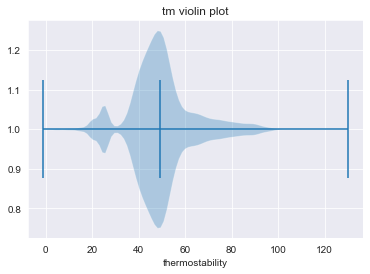

In [23]:
# violin plot (tm)
plt.violinplot(y_train, vert=False, widths=0.5, showmeans=True)
plt.title("tm violin plot") 
plt.xlabel("thermostability")
plt.show()
plt.close("all")

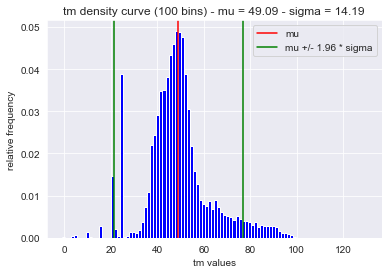

In [24]:
# density curve of label (tm)
bins = 100
plt.hist(y_train, color="b", bins=bins, density=True)
y_mean, y_std = y_stats['mean'], y_stats['std']
plt.axvline(y_mean, color="r", label="mu")
plt.axvline(y_mean-y_std*1.96, color="g", label="mu +/- 1.96 * sigma")
plt.axvline(y_mean+y_std*1.96, color="g")
plt.title(f"tm density curve ({bins} bins) - mu = {y_mean:.2f} - sigma = {y_std:.2f}")
plt.xlabel("tm values"), plt.ylabel("relative frequency")
plt.legend()
plt.show()
plt.close("all")

In [25]:
# normalize data (?)

In [43]:
#!pip install outlier_utils

#from outliers import smirnov_grubbs as grubbs

#result = {}
#for col in X_train.columns:
#    result[col] = grubbs.two_sided_test_indices(np.array(X_train_sc[col]), alpha=0.05)

#print(result)



C:\Users\rober\anaconda3\lib\site-packages\outliers\smirnov_grubbs.py:105: RuntimeWarning: invalid value encountered in double_scalars
  g = value / data.std()


KeyboardInterrupt: 

<b>Correlations</b> (with respect to the output variable)

In [9]:
# get k best scores between features and label -> pearson, spearman, f_regression and multi_info_regression
def get_k_best_corrs(k, scores):
    idxs = np.argsort(scores)[-k:]
    feats = X_train_sc.columns[idxs]
    scores = np.sort(scores)[-k:]
    return {f: c for f, c in zip(feats, scores)}

In [10]:
# RealPython -> https://realpython.com/numpy-scipy-pandas-correlation-python/

# Linear correlation measures the proximity of the mathematical relationship between variables or dataset features
# to a linear function. If the relationship between the two features is closer to some linear function, then their
# linear correlation is stronger and the absolute value of the correlation coefficient is higher.

# pearson correlations with respect to tm (label) -> measures linear correlations
def pearson_correlations(x: np.ndarray):
    return abs(scipy.stats.pearsonr(x, y_train)[0])

# Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features.
# If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are
# close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned
# only with the order of values, not with the particular values from the dataset.
# Allows to capture non-linear relationships (see figure below).

# spearman correlations with respect to tm (label) -> compares the ranks of data
def spearman_correlations(x: np.ndarray):
    return abs(scipy.stats.spearmanr(x, y_train).correlation)

In [11]:
pearson_corrs = np.apply_along_axis(pearson_correlations, axis=0, arr=X_train_sc)
spearman_corrs = np.apply_along_axis(spearman_correlations, axis=0, arr=X_train_sc)

![title](pearson_spearman.png)

In [12]:
# highest 100 pearson correlations
best_pearson = get_k_best_corrs(100, pearson_corrs)
best_pearson

{'DKY': 0.15266814153133518,
 'GQ': 0.15286365153343026,
 'EAQ': 0.15289552301813222,
 'AV': 0.15344493003827891,
 'FAT': 0.15350338513524256,
 'KKM': 0.15442712483828158,
 'AKK': 0.15442951930601523,
 'QT': 0.1546754948448122,
 'KLM': 0.15506147575685586,
 'KPN': 0.15614679682260235,
 'SCL': 0.15649190277972555,
 'GQR': 0.15682237066803156,
 'RTD': 0.15697681444754621,
 'LHK': 0.157142284572514,
 'LVM': 0.15716188338196335,
 'QHL': 0.1572030391749388,
 'KL': 0.15829185569280568,
 'YAD': 0.1584168666638824,
 'GKM': 0.15856469543391877,
 'SKG': 0.15859564646039082,
 'ADG': 0.1587400200194572,
 'HK': 0.15963941435489323,
 'GDT': 0.16125895341758134,
 'TK': 0.1613779793990864,
 'GVN': 0.16198659215162237,
 'FDK': 0.16301496580571873,
 'KM': 0.16308080977110492,
 'THE': 0.16358028851350914,
 'NAD': 0.16516995458724865,
 'YIY': 0.1653405413090765,
 'MVN': 0.16567866339095877,
 'CM': 0.16576213874417398,
 'RQG': 0.16612259484366063,
 'NNT': 0.1662320325215987,
 '_SolventAccessibilityD2025': 

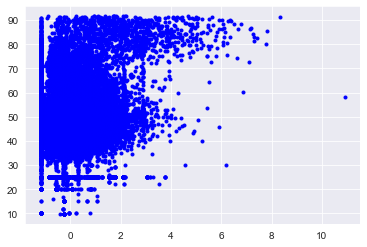

In [40]:
# highest correlation (pearson) -> 'AL'
plt.plot(X_train_sc["AL"], y_train, "b.")

In [13]:
# highest 100 spearman correlations
best_spearman = get_k_best_corrs(100, spearman_corrs)
best_spearman

{'GQR': 0.12962660212067384,
 'ETK': 0.13004809789779256,
 'KRF': 0.1303176805773361,
 'GKM': 0.1303421571404401,
 'LVM': 0.13047556331329602,
 'ADG': 0.13071474455829585,
 'RQG': 0.13098661870594847,
 'TS': 0.13121349362229823,
 'SAN': 0.13125223264214886,
 'NRS': 0.13182856454436126,
 'RTD': 0.13192560905438364,
 'GDT': 0.13196690532358818,
 'VSI': 0.13206023662371805,
 'HK': 0.13212793065896916,
 'YIY': 0.13272219915855835,
 'R': 0.13272362653837938,
 'MVN': 0.13277013284658468,
 'ST': 0.13342347819268413,
 'QT': 0.13358051373961205,
 'EFD': 0.13370615927206225,
 'KLM': 0.13372278039552202,
 'TLI': 0.13403988547059595,
 'STK': 0.13420492753514432,
 'EDN': 0.13447137015118002,
 'KM': 0.13480177065334706,
 'FAT': 0.13537791704118815,
 'RA': 0.13581753888988382,
 'DKG': 0.13605421762315262,
 'THE': 0.1361808260910424,
 'YKP': 0.13641926459247944,
 'KKM': 0.1365192400190705,
 'GQP': 0.13662112389017164,
 'TKK': 0.13698864077372286,
 'KPN': 0.1371519884529183,
 'CLV': 0.13719551451934017

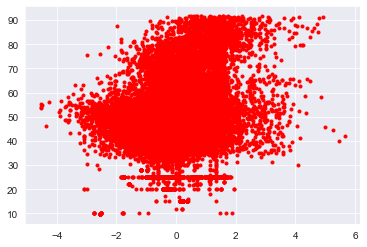

In [43]:
# highest correlation (spearman) -> '_SolventAccessibilityC1'
plt.plot(X_train_sc["_SolventAccessibilityC1"], y_train, "r.")

<b>Univariate linear regression</b> (F-statistic)

In [51]:
# From sklearn docs:
# Univariate linear regression tests returning F-statistic and p-values.
# f_regression is derived from r_regression (Pearson) and will rank features in the same order if all the features are
# positively correlated with the target.

In [14]:
from sklearn.feature_selection import f_regression

In [15]:
# highest 100 f-values
f_values, _ = f_regression(X_train_sc, y_train)
best_f_scores = get_k_best_corrs(100, f_values)
best_f_scores

{'DKY': 677.7548655886151,
 'GQ': 679.5334313693767,
 'EAQ': 679.8236045240703,
 'AV': 684.8360905787098,
 'FAT': 685.3705627438148,
 'KKM': 693.8462378127172,
 'AKK': 693.868280511569,
 'QT': 696.1346512690616,
 'KLM': 699.6989893213982,
 'KPN': 709.7737074147782,
 'SCL': 712.9934198698834,
 'GQR': 716.0838965508586,
 'RTD': 717.530688006666,
 'LHK': 719.0825116491569,
 'LVM': 719.2664338454196,
 'QHL': 719.65273666001,
 'KL': 729.913238679588,
 'YAD': 731.0962812094432,
 'GKM': 732.4965895679909,
 'SKG': 732.7899556485584,
 'ADG': 734.1592199896194,
 'HK': 742.7202083706278,
 'GDT': 758.2708012596833,
 'TK': 759.4205227833365,
 'GVN': 765.3140484966805,
 'FDK': 775.3282179645197,
 'KM': 775.9717917863237,
 'THE': 780.8632013504014,
 'NAD': 796.5414539573109,
 'YIY': 798.2338990504911,
 'MVN': 801.5942604308842,
 'CM': 802.4250400403686,
 'RQG': 806.0177902826666,
 'NNT': 807.1103008408148,
 '_SolventAccessibilityD2025': 808.583932196203,
 '_HydrophobicityD1025': 808.583932196203,
 'D

<b>Mutual information regression</b> (MI)

In [55]:
# From sklearn docs:
# Estimate mutual information for a continuous target variable.
# Mutual information (MI) (https://en.wikipedia.org/wiki/Mutual_information) between two random variables is
# a non-negative value, which measures the dependency between the variables. It is equal to zero if and only
# if two random variables are independent, and higher values mean higher dependency.

In [16]:
from sklearn.feature_selection import mutual_info_regression as mir

In [21]:
# highest 100 mi's (by default, n_neighbors=3 -> explore)
mis = mir(X_train_sc, y_train)
best_mis = get_k_best_corrs(100, mis)
best_mis

{'_SecondaryStrD1075': 0.32921775016853516,
 'TurnSSF': 0.3296591526807173,
 '_PolarizabilityD1050': 0.3298092153036709,
 '_SecondaryStrD3050': 0.33026090259165297,
 '_NormalizedVDWVD1050': 0.3307653036226652,
 '_NormalizedVDWVD2075': 0.3308574738212009,
 '_HydrophobicityD2025': 0.33152389437897245,
 '_ChargeD2075': 0.33187616152431954,
 'H': 0.33223241376345225,
 '_SecondaryStrD1050': 0.3339508718233777,
 '_PolarizabilityD1025': 0.3347491233806341,
 '_PolarityD3075': 0.33562253219804106,
 '_NormalizedVDWVD1075': 0.3362183214899712,
 '_PolarityD3050': 0.3364496686149234,
 '_SecondaryStrD2075': 0.3370228803204647,
 '_PolarityD2025': 0.337060228579257,
 '_PolarityD2050': 0.33730736031379926,
 '_HydrophobicityD3075': 0.33781547020327984,
 '_SecondaryStrD1025': 0.3382097036845959,
 '_PolarityD2075': 0.3384328277470967,
 '_NormalizedVDWVD1025': 0.33881137715184906,
 '_NormalizedVDWVD3075': 0.33883984528159505,
 '_SecondaryStrD2050': 0.33902360299854184,
 '_PolarizabilityD1075': 0.3393717989

#### Defining the most significant variables

In [16]:
# Create new training data based on the top 100 features (for both spearman and pearson)

X_train_SM = X_train_sc_z.loc[:,best_spearman.keys()]
X_train_PS = X_train_sc_z.loc[:,best_pearson.keys()]

In [128]:
X_train_SM.head()

,GQR,ETK,KRF,GKM,LVM,ADG,RQG,TS,SAN,NRS,...,IGM,_SolventAccessibilityT23,QPM,NIW,T,CMA,K,LMY,ICM,_SolventAccessibilityC1
0,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,1.817367,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,0.151038,-0.218189,-0.192412,0.309394,-0.193642,-0.378718,-0.226035,-0.185827,-0.107799
1,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.073354,-0.315313,-0.279966,...,-0.248737,-0.458539,-0.218189,-0.192412,-0.678440,-0.193642,-1.029394,-0.226035,-0.185827,1.151108
2,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,-0.702369,-0.218189,-0.192412,-0.970259,-0.193642,0.950440,-0.226035,-0.185827,0.243955
3,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.126348,-0.315313,-0.279966,...,-0.248737,-0.214708,-0.218189,-0.192412,-0.065802,-0.193642,0.366500,-0.226035,-0.185827,-0.589146
4,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,0.032636,-0.315313,-0.279966,...,-0.248737,1.705457,-0.218189,-0.192412,1.810782,-0.193642,-0.450274,-0.226035,-0.185827,-1.644406


In [48]:
X_train_PS.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
0,-0.267463,-0.235935,-0.346617,0.824652,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.161105,-0.117881,-0.184867,-0.257779,0.009605,1.140561
1,-0.267463,0.743002,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,0.337159,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.445497,1.130644,-0.184867,-0.257779,3.146741,-1.184397
2,-0.267463,-0.680907,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,2.429193,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.688137,0.230972,-0.184867,-0.257779,-0.815957,0.166985
3,-0.267463,-0.680907,-0.346617,-0.445533,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.202856,-0.595258,-0.184867,-0.257779,-0.815957,0.588383
4,-0.267463,-0.680907,-0.346617,-0.336660,-0.283886,-0.269837,-0.391064,4.178271,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,1.707939,-1.641816,-0.184867,-0.257779,-0.072951,-1.184397


<b>Correlations</b> (pairs of variables)

Um problema que pode ocorrer nos dados é a multicolinearidade, quando se observa correlações elevadas entre variáveis independentes. Isto pode fazer com que os resultados obtidos de análises de machine leraning, como na aplicação de regressões lineares, não sejam fidedígnos. **(explicar?)** Desta forma, deve-se remover uma das variáveis altamente correlacionadas, de preferência a que está menos correlacionada com a variável alvo.

Desta forma, criou-se uma função para averiguar a possibilidade de multicolinearidade (usando as correlações de pearson e spearman) e devolvendo os pares de variáveis com correlações elevadas. Na generalidade, considera-se uma correlação elevada quando se obtém um valor absoluto igual ou superior a 0.8.

Após ser analisado uma correlação elevada, compara-se cada variável independente com a dependente, de forma a averiguar qual é a que está menos correlacionada e, portanto, deve ser removida. A função devolve, assim, os pares de variáveis altamente correlacionados, e ainda qual a variável desse par que deverá ser removida.

In [23]:
# Function to determine the independent variables that are highly correlated with one another
# (they result in less reliable statistical inference)

def _check_xy_corr(y_data:pd.DataFrame, var1:str, var2:str):
    """
    Returns the name of the variable worse correlated to y
    """
    corr1 = y_data.loc[var1,:]
    corr2 = y_data.loc[var2,:]

    if corr1 < corr2:
        return var1
    else:
        return var2


def multicolinearity(x_data:pd.DataFrame, y_data:pd.DataFrame, perc:float=0.8, method="pearson") -> list:
    """
    Selects pair os variables with collinearity above a given threshold.

    Parameters
    ----------
    :param x_data: Dataframe with independent variables
    :param y_var: Indicates column index or name of the dependent variable. If non-existent, define this parameter as None.
    :param perc: Collinearity percentage threshold
    :param method: Method to determine correlation between variables ('pearson', 'kendall', 'spearman')
    """

    corr = x_data.corr(method=method.lower())
    result = []
    check = 1
    for l in corr:
        for ix,val in enumerate(corr[l][check:]):
            if val>=perc:
                var1, var2 = (l, corr.index[ix])
                if y_data:
                    least_corr = _check_xy_corr(y_data, var1, var2)
                    result.append(((var1, var2), least_corr))
                else:
                    result.append((var1, var2))
            check += 1
    return result

In [24]:
multicol_sm = multicolinearity(X_train_SM, y_train, perc=0.8, method="spearman")

for elem in multicol_sm:
    print(elem)
#Multicollinearity non-existent

In [25]:
multicol_ps = multicolinearity(X_train_PS, y_train, perc=0.8, method="pearson")

for elem in multicol_ps:
    print(elem)
#Multicollinearity non-existent

Em nenhum dos casos (considerando os 100 descritores mais relevantes pelo método de spearman e pearson) se observou multicolinearidade.

Caso tivesse sido observado, utilizaríamos o seguinte bloco de código para remover as variáveis menos correlacionadas com a variável dependente.

In [67]:
# Eliminate variables with multicollinearity

#pairs, least_corr = list(zip(*multicol))
#least_corr = set(least_corr)

#for elem in least_corr:
#    del X_train[elem]

# Unsupervised learning

Passando para a análise dos dados, começamos aplicar algoritmos de aprendizagem não-supervisionada, ou seja, que não tem em conta a variável dependente. Retiram inferências apenas a partir dos descritores, podendo ser aplicados para reduzir a dimensionalidade do dataset, e até mesmo agrupar os dados de acordo com a sua proximidade.

Os algoritmos de aprendizagem não-supervivionada, como o PCA, são sensíveis às escalas dos valores e outliers. Uma vez que já se efetuou a standardização dos dados, não é necessário efetuar esse passo novamente. Relativamente aos outliers, procuraram-se as linhas que contêm apenas valores inferiores a 3, ou seja, que contêm valores inferiores a 3 vezes o desvio padrão (considerando-se outlier). Desta forma, são removidas as linhas que não satisfazem esta condição.

In [17]:
#Removing outliers



X_train_PS_clean = X_train_PS[(np.abs(X_train_PS) < 3).all(axis=1)]
X_train_PS_clean.index = range(len(X_train_PS_clean))
X_train_SM_clean = X_train_SM[(np.abs(X_train_SM) < 3).all(axis=1)]
X_train_SM_clean.index = range(len(X_train_SM_clean))

y_train_PS = y_train.loc[list((np.abs(X_train_PS) < 3).all(axis=1))]
y_train_PS.index = range(len(y_train_PS))
y_train_SM = y_train.loc[list((np.abs(X_train_SM) < 3).all(axis=1))]
y_train_SM.index = range(len(y_train_SM))

print(X_train_PS.shape)
print(X_train_PS_clean.shape)
print(y_train_PS.shape)
print()
print(X_train_SM.shape)
print(X_train_SM_clean.shape)
print(y_train_SM.shape)
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

(28403, 100)
(5948, 100)
(5948,)

(28403, 100)
(6477, 100)
(6477,)


In [30]:
X_train_PS_clean.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
15,-0.267463,0.431522,-0.346617,-0.082623,-0.283886,-0.269837,-0.391064,0.954480,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.464406,-0.521816,-0.184867,-0.257779,0.215995,0.254170
16,-0.267463,0.720753,-0.346617,0.389160,-0.283886,-0.269837,-0.391064,-0.314459,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.384836,0.084086,-0.184867,-0.257779,-0.299981,0.094330
19,-0.267463,-0.146941,-0.346617,-0.554406,-0.283886,-0.269837,-0.391064,0.062793,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.858697,-0.852308,-0.184867,-0.257779,-0.320620,-0.835654
29,-0.267463,-0.680907,-0.346617,-0.391097,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.263516,0.561464,-0.184867,-0.257779,0.546220,0.239639
31,-0.267463,0.387025,-0.346617,-0.554406,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.172526,-0.319848,-0.184867,-0.257779,0.174717,-0.138166


Foi possível remover 22222 amostras do dataset do pearson, e 21726 amostras do dataset do spearman. As novas variáveis criadas têm valores mais homogênios que vão permitir uma prestação mais fidedígna dos algoritmos de aprendizagem não-supervisionada. Vamos analisar o efeito de 2 algoritmos: **PCA** e **tSNE**.

#### PCA

Começamos com o algorítmo do PCA (Principal Components Analysis). Este algoritmo tem o objetivo de reduzir a dimensionalidade, ao encontrar uma nova forma de representar os dados que explique o máximo da variância possível. Desta forma, é geralmente possível eliminar informação que não contribui muito para a variabilidade dos dados, fornecendo dados menos ruidosos aos eventuais algoritmos de aprendizagem aplicados.

In [130]:
from sklearn.decomposition import PCA

pca_SM = PCA()
pca_SM.fit(X_train_SM_clean)
x_reduced_SM = pca_SM.transform(X_train_SM_clean)

pca_PS = PCA()
pca_PS.fit(X_train_PS_clean)
x_reduced_PS = pca_PS.transform(X_train_PS_clean)

[1.58349946e+01 1.19868417e+01 7.69860902e+00 5.78776121e+00
 4.55715104e+00 3.61589294e+00 3.09353735e+00 2.80958183e+00
 2.66072014e+00 2.34178112e+00 2.09030455e+00 1.95181483e+00
 1.92950259e+00 1.77384607e+00 1.70977808e+00 1.68653116e+00
 1.57966308e+00 1.48635047e+00 1.36186695e+00 1.30986550e+00
 1.25323662e+00 1.10317744e+00 1.07231966e+00 1.00774743e+00
 9.86784333e-01 9.46418059e-01 9.26852830e-01 8.92194457e-01
 8.77838259e-01 8.48371205e-01 8.46325056e-01 8.29659537e-01
 8.01798273e-01 7.94884979e-01 7.80413081e-01 7.67277296e-01
 7.44147847e-01 7.16520115e-01 7.05616514e-01 6.92158194e-01
 6.65515813e-01 5.57787611e-01 5.55566651e-01 5.27902376e-01
 5.06248142e-01 4.82487518e-01 4.39759189e-01 4.06054190e-01
 4.02015064e-01 3.83264184e-01 2.13263837e-01 3.12417291e-30
 1.00606850e-30 9.32823811e-31 6.77004404e-31 4.91479842e-31
 4.90945494e-31 3.03792203e-31 2.53950748e-31 2.40682866e-31
 1.30506360e-31 9.62562489e-32 8.45212637e-32 8.45212637e-32
 8.45212637e-32 8.452126

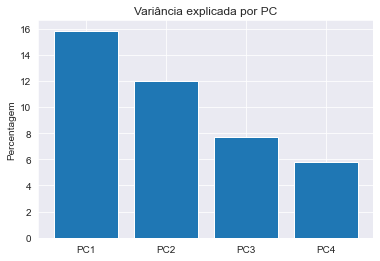

In [131]:
print(pca_SM.explained_variance_ratio_*100)

print()
print("Spearman:")
print(f"Número total de PCs: {pca_SM.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_SM.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_SM.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

[1.37852940e+01 1.16982816e+01 9.24791356e+00 6.62364218e+00
 5.17924856e+00 4.23030726e+00 3.15678657e+00 2.96802570e+00
 2.75196204e+00 2.59458985e+00 2.07394720e+00 2.06367677e+00
 1.93450496e+00 1.87517368e+00 1.78896947e+00 1.67624857e+00
 1.56575690e+00 1.53979298e+00 1.48090454e+00 1.44162142e+00
 1.34480829e+00 1.20400829e+00 1.12530345e+00 1.09938136e+00
 9.86151953e-01 9.26902232e-01 8.61259244e-01 8.56166813e-01
 8.48130658e-01 8.13589295e-01 7.91618237e-01 7.36713830e-01
 7.26963634e-01 7.06370113e-01 6.50835634e-01 6.21134742e-01
 5.93519139e-01 5.72303308e-01 5.35604244e-01 5.14758114e-01
 5.03816602e-01 4.96057283e-01 4.45902545e-01 4.34321668e-01
 4.02778364e-01 3.97518502e-01 3.81252062e-01 2.98513360e-01
 2.56083975e-01 1.91585319e-01 2.71890802e-30 7.99448038e-31
 6.01647897e-31 4.84908893e-31 4.28612401e-31 4.08482469e-31
 3.30915483e-31 2.52591868e-31 1.93035826e-31 1.55499273e-31
 9.69289533e-32 6.17276016e-32 6.17276016e-32 6.17276016e-32
 6.17276016e-32 6.172760

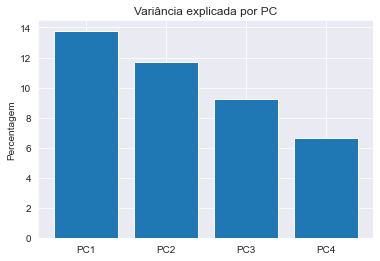

In [132]:
print(pca_PS.explained_variance_ratio_*100)

print()
print("Pearson:")
print(f"Número total de PCs: {pca_PS.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_PS.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_PS.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

Os resultados demonstram que, para os 100 melhores features selecionados pelo método de spearman, é possível utilizar apenas 41 componentes para explicar 95% da variância, e para os 100 features selecionados pelo método de spearman, é possível utilizar apenas 38 componentes.

*NOTA: ao utilizar os dados isentos de outliers (valores standardizados superiores a 3), obtivemos resultados muito insatisfatórios na aprendizagem supervisionada, pelo que decidimos não utilizar estes dados, nem os reduzidos pelo PCA.*

#### t-SNE

tSNE ('t-distributed Stochastic Neighbor Embedding') aplica um método de redução de dimensionalidade semelhante ao PCA, mas tem como principal foco a visualização dos dados transformados. Neste caso, é necessário definir em quantos grupos deverão ser separados os dados. Como a variável dependente se trata de de valores contínuos, não é óbvio o número de grupos que se deverá separar os dados. Desta forma, optou-se por separá-los em 3 grupos baseados na variável dependente:

- os que estão próximos da média;
- os que estão acima de um desvio-padrão da média;
- os que estão abaixo de um desvio-padrão da média.

Apesar deste algoritmo não ser tão sensível a outliers como no caso do PCA, vamos efetuar a análise sem outliers para visualizar melhor os gráficos resultantes. É, contudo, um algoritmo com elevado peso computacional, pelo que pode demorar bastante tempo a correr.

In [80]:
mean = y_train.mean()
std = y_train.std()

ub = mean+std
lb = mean-std

In [87]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)

points_sm = tsne.fit_transform(X_train_SM_clean)
points_ps = tsne.fit_transform(X_train_PS_clean)

group1_sm = y_train_SM.index[y_train_SM > ub]
group2_sm = y_train_SM.index[(y_train_SM <= lb) & (y_train_SM > lb)]
group3_sm = y_train_SM.index[y_train_SM <= lb]

group1_ps = y_train_PS.index[y_train_PS > ub]
group2_ps = y_train_PS.index[(y_train_PS <= lb) & (y_train_PS > lb)]
group3_ps = y_train_PS.index[y_train_PS <= lb]

C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


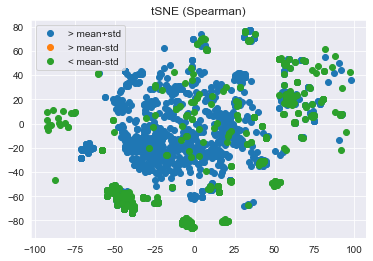

In [88]:
for group, lab in zip((group1_sm, group2_sm, group3_sm), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_sm[group,0], points_sm[group,1], "o", label=lab)
plt.title("tSNE (Spearman)")
plt.legend(loc="best")
plt.show()

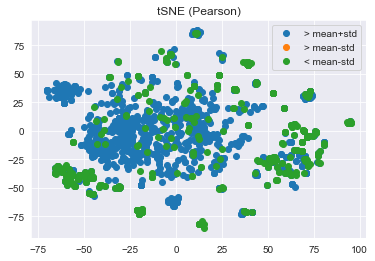

In [89]:
for group, lab in zip((group1_ps, group2_ps, group3_ps), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_ps[group,0], points_ps[group,1], "o", label=lab)
plt.title("tSNE (Pearson)")
plt.legend(loc="best")
plt.show()

Os resultados demonstram que não é possível separar de forma clara os pontos com base nos grupos definidos.

# Supervised learning

#### Get best combination dataset-model

In [17]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import AdaBoostRegressor as ADA
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LR

In [18]:
DEFAULT_NUMS = [100, 400, 800, 1200]

In [19]:
def test_corr_models(model, method, scores, cv=5, num_feats=DEFAULT_NUMS):
    print(f"Getting results for {model.__class__.__name__} using {method}...\n")
    for k in num_feats:
        best_scores = get_k_best_corrs(k, scores) #Get best features
        #data_scaled = StandardScaler().fit_transform(X_train_sc.loc[:,best_scores.keys()]) #Select data of best features
        result = cross_validate(model, X_train_sc.loc[:, best_scores.keys()], y_train, cv=cv, return_train_score=True)
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Results for {k} best features")
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

##### Pearson

In [20]:
for i, Model in enumerate([MLPR]): #LR, RFR, ADA, SVR
    test_corr_models(model=Model(), method="Pearson correlation", scores=pearson_corrs)
    if i < 4:
        print("--------------------------------------------------------------------------------\n")

Getting results for MLPRegressor using Pearson correlation...



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 100 best features
Train scores: [0.45202777 0.43871447 0.45321541 0.45765465 0.45912327] -> mean_train = 0.4521
Test scores: [ 0.2031334   0.16033084 -0.08987277  0.2116972   0.15462226] -> mean_test = 0.1280



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 400 best features
Train scores: [0.47475198 0.4923954  0.50451639 0.50400392 0.47938821] -> mean_train = 0.4910
Test scores: [0.23719782 0.36519414 0.2931955  0.35681098 0.23217787] -> mean_test = 0.2969



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 800 best features
Train scores: [0.55805531 0.56752787 0.54657214 0.52045875 0.54403841] -> mean_train = 0.5473
Test scores: [0.14783581 0.36859843 0.27241315 0.3401092  0.34026483] -> mean_test = 0.2938



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 1200 best features
Train scores: [0.60004007 0.60734283 0.6379186  0.53613144 0.58864283] -> mean_train = 0.5940
Test scores: [0.18884443 0.32031392 0.36322389 0.28063518 0.31413352] -> mean_test = 0.2934

--------------------------------------------------------------------------------



(MinMaxScaler)

Getting results for LinearRegression using Pearson correlation...

Results for 100 best features
Train scores: [0.27011736 0.28650022 0.22313226 0.26490225 0.26940456] -> mean_train = 0.2628
Test scores: [0.14711361 0.10705096 0.27218331 0.20173697 0.18240789] -> mean_test = 0.1821

Results for 400 best features
Train scores: [0.41665499 0.39386691 0.3850985  0.39537238 0.41242381] -> mean_train = 0.4007
Test scores: [0.08573871 0.2893108  0.33210872 0.30932031 0.1514813 ] -> mean_test = 0.2336

Results for 800 best features
Train scores: [0.44620921 0.43236111 0.43381858 0.43981191 0.4531923 ] -> mean_train = 0.4411
Test scores: [0.06293847 0.27328139 0.33204977 0.30332439 0.17662368] -> mean_test = 0.2296

Results for 1200 best features
Train scores: [0.47941186 0.45920366 0.44087096 0.46595271 0.46848766] -> mean_train = 0.4628
Test scores: [0.08041124 0.27869326 0.287661   0.29106935 0.1168009 ] -> mean_test = 0.2109

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.81861813 0.84025213 0.85172038 0.81723961 0.82355589] -> mean_train = 0.8303
Test scores: [0.22094994 0.23278113 0.25640221 0.31260307 0.2571411 ] -> mean_test = 0.2560

Results for 400 best features
Train scores: [0.84739424 0.86756812 0.87518231 0.84538561 0.85187832] -> mean_train = 0.8575
Test scores: [0.23421498 0.35857337 0.24336712 0.36769986 0.31232961] -> mean_test = 0.3032

Results for 800 best features
Train scores: [0.84771979 0.86827125 0.87595901 0.8461804  0.85253105] -> mean_train = 0.8581
Test scores: [0.22143367 0.32069786 0.19008172 0.38143426 0.31148471] -> mean_test = 0.2850

Results for 1200 best features
Train scores: [0.87676433 0.90002164 0.89224492 0.87385361 0.87793775] -> mean_train = 0.8842
Test scores: [0.27083525 0.33920909 0.20056345 0.38527337 0.27747011] -> mean_test = 0.2947

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.21789023 0.24789051 0.1688259  0.1946165  0.24299579] -> mean_train = 0.2144
Test scores: [0.0217743  0.0393838  0.06749173 0.11066504 0.1454537 ] -> mean_test = 0.0770

Results for 400 best features
Train scores: [0.32242365 0.32898748 0.27168506 0.28805197 0.30137941] -> mean_train = 0.3025
Test scores: [0.12702293 0.20443145 0.13614342 0.22957511 0.14922126] -> mean_test = 0.1693

Results for 800 best features
Train scores: [0.29640638 0.31946727 0.28776308 0.29008702 0.32292222] -> mean_train = 0.3033
Test scores: [0.09409807 0.17705651 0.13124845 0.21650374 0.18319332] -> mean_test = 0.1604

Results for 1200 best features
Train scores: [0.30405968 0.21448556 0.23909915 0.28300452 0.30514278] -> mean_train = 0.2692
Test scores: [0.07639932 0.08501833 0.0728567  0.18245674 0.12884878] -> mean_test = 0.1091

--------------------------------------------------------------------------------

Getting results for SVR using Pearson correlation...

Results for 100 best features
Train scores: [0.31371592 0.31834536 0.3022404  0.31092042 0.31666435] -> mean_train = 0.3124
Test scores: [0.21283891 0.16427215 0.07069547 0.25263497 0.24485791] -> mean_test = 0.1891

Results for 400 best features
Train scores: [0.28378963 0.26807723 0.24905719 0.26710835 0.28725249] -> mean_train = 0.2711
Test scores: [0.18274096 0.15177209 0.24838459 0.22915948 0.18186443] -> mean_test = 0.1988

Results for 800 best features
Train scores: [0.27629772 0.25743841 0.23863574 0.26184484 0.27565766] -> mean_train = 0.2620
Test scores: [0.17035563 0.15027543 0.22394396 0.19866285 0.16760289] -> mean_test = 0.1822

Results for 1200 best features
Train scores: [0.26972242 0.25406078 0.23311293 0.25886046 0.27116362] -> mean_train = 0.2574
Test scores: [0.16767649 0.14030832 0.19821048 0.1878921  0.1576652 ] -> mean_test = 0.1704

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.45202777 0.43871447 0.45321541 0.45765465 0.45912327] -> mean_train = 0.4521
Test scores: [ 0.2031334   0.16033084 -0.08987277  0.2116972   0.15462226] -> mean_test = 0.1280

Results for 400 best features
Train scores: [0.47475198 0.4923954  0.50451639 0.50400392 0.47938821] -> mean_train = 0.4910
Test scores: [0.23719782 0.36519414 0.2931955  0.35681098 0.23217787] -> mean_test = 0.2969

Results for 800 best features
Train scores: [0.55805531 0.56752787 0.54657214 0.52045875 0.54403841] -> mean_train = 0.5473
Test scores: [0.14783581 0.36859843 0.27241315 0.3401092  0.34026483] -> mean_test = 0.2938

Results for 1200 best features
Train scores: [0.60004007 0.60734283 0.6379186  0.53613144 0.58864283] -> mean_train = 0.5940
Test scores: [0.18884443 0.32031392 0.36322389 0.28063518 0.31413352] -> mean_test = 0.2934




(Z-scores)

Getting results for LinearRegression using Pearson correlation...

Results for 100 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

Results for 400 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

Results for 800 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.80727911 0.83041557 0.84220175 0.80666646 0.81338696] -> mean_train = 0.8200
Test scores: [0.1891794  0.18649405 0.18417251 0.27658475 0.22553633] -> mean_test = 0.2124

Results for 400 best features
Train scores: [0.84161805 0.86398035 0.86833273 0.84003347 0.84644822] -> mean_train = 0.8521
Test scores: [0.19887344 0.31872482 0.23552122 0.35482832 0.28120151] -> mean_test = 0.2778

Results for 800 best features
Train scores: [0.84235855 0.86518026 0.86934521 0.8409079  0.84660065] -> mean_train = 0.8529
Test scores: [0.18125953 0.29988959 0.12022268 0.3604441  0.2963378 ] -> mean_test = 0.2516

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.24087864 0.23950204 0.16925286 0.19086963 0.25147329] -> mean_train = 0.2184
Test scores: [0.08491198 0.0297712  0.16957604 0.10801696 0.14612454] -> mean_test = 0.1077

Results for 400 best features
Train scores: [0.29832073 0.31678918 0.27567914 0.30577065 0.30121334] -> mean_train = 0.2996
Test scores: [0.0998887  0.18089942 0.15771938 0.25511451 0.15684757] -> mean_test = 0.1701

Results for 800 best features
Train scores: [0.34946497 0.26841796 0.33437571 0.29196208 0.33172762] -> mean_train = 0.3152
Test scores: [0.1768113  0.12819227 0.15462779 0.20862672 0.19958328] -> mean_test = 0.1736

--------------------------------------------------------------------------------

Getting results for SVR using Pearson correlation...

Results for 100 best features
Train scores: [0.3470447  0.34487087 0.35734174 0.34269595 0.35251758] -> mean_train = 0.3489
Test scores: [0.18790998 0.14018134 0.10888095 0.225853   0.22270535] -> mean_test = 0.1771

Results for 400 best features
Train scores: [0.40986956 0.39526794 0.41410988 0.39641576 0.41763621] -> mean_train = 0.4067
Test scores: [0.206643   0.18902751 0.11136261 0.27958821 0.22978204] -> mean_test = 0.2033

Results for 800 best features
Train scores: [0.42662508 0.4044915  0.4269925  0.40696331 0.42792255] -> mean_train = 0.4186
Test scores: [0.20535089 0.19830048 0.1409307  0.28567528 0.23900059] -> mean_test = 0.2139

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.53202    0.52313445 0.57137021 0.53976422 0.54659028] -> mean_train = 0.5426
Test scores: [-0.05543219  0.1250431   0.2640586   0.1859917   0.05506732] -> mean_test = 0.1149

Results for 400 best features
Train scores: [0.78213761 0.78802413 0.82398603 0.7461426  0.77420503] -> mean_train = 0.7829
Test scores: [-0.17832807  0.17922449 -0.82818129  0.17095727 -0.17155348] -> mean_test = -0.1656

Results for 800 best features
Train scores: [0.65240063 0.81298679 0.85650392 0.80202072 0.81944741] -> mean_train = 0.7887
Test scores: [-0.3428903   0.13659494 -6.15435645  0.14391498 -0.25913343] -> mean_test = -1.2952


##### Spearman

In [21]:
for i, Model in enumerate([LR, RFR, ADA, SVR, MLPR]):
    test_corr_models(model=Model(), method="Spearman correlation", scores=spearman_corrs)
    if i < 4:
        print("--------------------------------------------------------------------------------\n")

Getting results for LinearRegression using Spearman correlation...

Results for 100 best features
Train scores: [0.24921425 0.27093374 0.19917184 0.24836267 0.25260701] -> mean_train = 0.2441
Test scores: [0.12833164 0.08071247 0.30922312 0.16954245 0.07740915] -> mean_test = 0.1530

Results for 400 best features
Train scores: [0.4025985  0.38290001 0.36831767 0.39148884 0.40252618] -> mean_train = 0.3896
Test scores: [ 0.11624326  0.23527244  0.35650679  0.27089772 -0.14652723] -> mean_test = 0.1665

Results for 800 best features
Train scores: [0.44845567 0.43248325 0.4326496  0.44199982 0.45568573] -> mean_train = 0.4423
Test scores: [0.16300762 0.30164229 0.31059724 0.31290982 0.07484427] -> mean_test = 0.2326

Results for 1200 best features
Train scores: [0.48010521 0.45825764 0.46333424 0.45450236 0.47633618] -> mean_train = 0.4665
Test scores: [0.10893423 0.28829533 0.29607386 0.27848742 0.10913831] -> mean_test = 0.2162

----------------------------------------------------------

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 100 best features
Train scores: [0.46308    0.43662746 0.44424994 0.43677552 0.44358956] -> mean_train = 0.4449
Test scores: [ 0.03581221  0.13530282 -0.8988539   0.23407946  0.05936877] -> mean_test = -0.0869



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 400 best features
Train scores: [0.52548503 0.5186544  0.55516421 0.52769569 0.44315011] -> mean_train = 0.5140
Test scores: [0.25086634 0.37064945 0.35341974 0.34305033 0.11683819] -> mean_test = 0.2870



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 800 best features
Train scores: [0.56269636 0.57803714 0.55488283 0.5593286  0.52405762] -> mean_train = 0.5558
Test scores: [0.15751221 0.37946022 0.29111232 0.37348009 0.30562286] -> mean_test = 0.3014



C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Results for 1200 best features
Train scores: [0.59737034 0.55466742 0.59562882 0.5875031  0.53883696] -> mean_train = 0.5748
Test scores: [0.19248025 0.32994159 0.20769372 0.32922724 0.26530933] -> mean_test = 0.2649



Getting results for LinearRegression using Spearman correlation...

Results for 100 best features
Train scores: [0.24921425 0.27093374 0.19917184 0.24836267 0.25260701] -> mean_train = 0.2441
Test scores: [0.12833164 0.08071247 0.30922312 0.16954245 0.07740915] -> mean_test = 0.1530

Results for 400 best features
Train scores: [0.4025985  0.38290001 0.36831767 0.39148884 0.40252618] -> mean_train = 0.3896
Test scores: [ 0.11624326  0.23527244  0.35650679  0.27089772 -0.14652723] -> mean_test = 0.1665

Results for 800 best features
Train scores: [0.44845567 0.43248325 0.4326496  0.44199982 0.45568573] -> mean_train = 0.4423
Test scores: [0.16300762 0.30164229 0.31059724 0.31290982 0.07484427] -> mean_test = 0.2326

Results for 1200 best features
Train scores: [0.48010521 0.45825764 0.46333424 0.45450236 0.47633618] -> mean_train = 0.4665
Test scores: [0.10893423 0.28829533 0.29607386 0.27848742 0.10913831] -> mean_test = 0.2162

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.79790694 0.81899067 0.83845994 0.79660533 0.8045238 ] -> mean_train = 0.8113
Test scores: [ 0.18483478  0.15368858 -0.25720172  0.2958112   0.21631886] -> mean_test = 0.1187

Results for 400 best features
Train scores: [0.8474152  0.86798361 0.87595374 0.84598044 0.85213325] -> mean_train = 0.8579
Test scores: [0.22281325 0.31339996 0.18994458 0.37560868 0.32661866] -> mean_test = 0.2857

Results for 800 best features
Train scores: [0.8477982  0.86835485 0.87645327 0.84625799 0.85241732] -> mean_train = 0.8583
Test scores: [0.24889581 0.34326805 0.16376661 0.37541566 0.31084247] -> mean_test = 0.2884

Results for 1200 best features
Train scores: [0.84772302 0.86877618 0.87635444 0.84619647 0.85224971] -> mean_train = 0.8583
Test scores: [0.25188013 0.34737981 0.19047434 0.37756621 0.29847012] -> mean_test = 0.2932

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.24821102 0.25230277 0.21134905 0.21002211 0.23393682] -> mean_train = 0.2312
Test scores: [0.1175337  0.03529187 0.08088012 0.16061473 0.14581597] -> mean_test = 0.1080

Results for 400 best features
Train scores: [0.29865158 0.31315385 0.25569119 0.33387219 0.32322424] -> mean_train = 0.3049
Test scores: [0.07679387 0.17580784 0.10835713 0.28114289 0.21491714] -> mean_test = 0.1714

Results for 800 best features
Train scores: [0.3076953  0.3517414  0.32845105 0.34109796 0.31832754] -> mean_train = 0.3295
Test scores: [0.08846429 0.20249093 0.13341789 0.27885762 0.17941891] -> mean_test = 0.1765

Results for 1200 best features
Train scores: [0.31154677 0.30782744 0.27839546 0.29130889 0.32315659] -> mean_train = 0.3024
Test scores: [0.11880103 0.18370943 0.11145375 0.21734129 0.174815  ] -> mean_test = 0.1612

--------------------------------------------------------------------------------

Getting results for SVR using Spearman correlation...

Results for 100 best features
Train scores: [0.30884939 0.32273583 0.30089287 0.3053253  0.31058927] -> mean_train = 0.3097
Test scores: [0.21621466 0.12125812 0.1112789  0.25380752 0.23638237] -> mean_test = 0.1878

Results for 400 best features
Train scores: [0.26754801 0.25625888 0.22697208 0.25103663 0.26315251] -> mean_train = 0.2530
Test scores: [0.1723757  0.13718039 0.25440779 0.20893442 0.17647675] -> mean_test = 0.1899

Results for 800 best features
Train scores: [0.27200646 0.25702211 0.23535592 0.25894348 0.27205739] -> mean_train = 0.2591
Test scores: [0.18259951 0.14574259 0.21460884 0.20840586 0.16562045] -> mean_test = 0.1834

Results for 1200 best features
Train scores: [0.27213732 0.25572714 0.23750669 0.25962499 0.27161214] -> mean_train = 0.2593
Test scores: [0.17233394 0.13768511 0.17746137 0.19825448 0.15705791] -> mean_test = 0.1686

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.46308    0.43662746 0.44424994 0.43677552 0.44358956] -> mean_train = 0.4449
Test scores: [ 0.03581221  0.13530282 -0.8988539   0.23407946  0.05936877] -> mean_test = -0.0869

Results for 400 best features
Train scores: [0.52548503 0.5186544  0.55516421 0.52769569 0.44315011] -> mean_train = 0.5140
Test scores: [0.25086634 0.37064945 0.35341974 0.34305033 0.11683819] -> mean_test = 0.2870

Results for 800 best features
Train scores: [0.56269636 0.57803714 0.55488283 0.5593286  0.52405762] -> mean_train = 0.5558
Test scores: [0.15751221 0.37946022 0.29111232 0.37348009 0.30562286] -> mean_test = 0.3014

Results for 1200 best features
Train scores: [0.59737034 0.55466742 0.59562882 0.5875031  0.53883696] -> mean_train = 0.5748
Test scores: [0.19248025 0.32994159 0.20769372 0.32922724 0.26530933] -> mean_test = 0.2649

##### Univariate linear regression

In [ ]:
for i, Model in enumerate([LR, RFR, ADA, SVR, MLPR]):
    test_corr_models(model=Model(), method="univariate linear regression", scores=f_values)
    if i < 4:
        print("--------------------------------------------------------------------------------\n")

Getting results for LinearRegression using univariate linear regression...

Results for 100 best features
Train scores: [0.27011736 0.28650022 0.22313226 0.26490225 0.26940456] -> mean_train = 0.2628
Test scores: [0.14711361 0.10705096 0.27218331 0.20173697 0.18240789] -> mean_test = 0.1821

Results for 400 best features
Train scores: [0.41665499 0.39386691 0.3850985  0.39537238 0.41242381] -> mean_train = 0.4007
Test scores: [0.08573871 0.2893108  0.33210872 0.30932031 0.1514813 ] -> mean_test = 0.2336

Results for 800 best features
Train scores: [0.44620921 0.43236111 0.43381858 0.43981191 0.4531923 ] -> mean_train = 0.4411
Test scores: [0.06293847 0.27328139 0.33204977 0.30332439 0.17662368] -> mean_test = 0.2296

Results for 1200 best features
Train scores: [0.47941186 0.45920366 0.44087096 0.46595271 0.46848766] -> mean_train = 0.4628
Test scores: [0.08041124 0.27869326 0.287661   0.29106935 0.1168009 ] -> mean_test = 0.2109

-------------------------------------------------------

##### Mutual information (MI) regression

In [ ]:
for i, Model in enumerate([LR, RFR, ADA, SVR, MLPR]):
    test_corr_models(model=Model(), method="mutual information regression", scores=mis)
    if i < 4:
        print("--------------------------------------------------------------------------------\n")

##### SelectFromModel -> TODO

In [38]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
def cv_select_from_model(models: list, cv=5):
    """
    Cross-validates models using features outputed by sklearn's SelectFromModel using a Random Forest
    Regressor as estimator. Returns the computed feature mask for further use.

    Parameters
    ----------
    models: list
        A list object containing uninitialized sklearn models
    cv: int (default=5)
        Number of folds used in cross-validation
    """
    # select best features according to RFR feature importances
    # features whose absolute importance value is greater or equal to the mean importance are kept
    selector = SelectFromModel(estimator=RFR())
    selector.fit(X_train_sc, y_train)
    feature_mask = selector.get_support()
    # new dataframe containing the features selected by SelectFromModel
    X_train_new = X_train_sc[feature_mask]
    # iterate through models and cross-validate
    for Model in models:
        result = cross_validate(Model, X_train_new, y_train, cv=cv, return_train_score=True)
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")
    return feature_mask

In [ ]:
feature_mask = cv_select_from_model([LR, RFR, ADA, SVR, MLPR])

#### Optimize hyperparameters of the best models

In [40]:
from sklearn.model_selection import GridSearchCV

In [ ]:
HYPER = {"LinearRegression": {"fit_intercept": [True, False], "positive": [True, False]},
         "RandomForestRegressor": {"n_estimators": [100, 200], "criterion": ["squared_error", "friedman_mse"],
                                   "min_samples_split": [2, 3, 4], "min_samples_leaf": [2, 3, 4],
                                   "max_features": ["sqrt", "log2", 1.0], "bootstrap": [True, False]},
         "SVR": {"kernel": ["linear", "poly", "rbf", "sigmoid"], "degree": [2, 3, 4], "gamma": ["scale", "auto"],
                 "coef0": [0.0, 1.0], "C": [0.1, 1, 2, 10]},
         "MLPRegressor": {"hidden_layer_sizes": [(100,), (200,), (400,)], "activation": ["relu", "logistic"],
                          "solver": ["sgd", "adam", "rmsprop"], "batch_size": [32, 64, 128],
                          "learning_rate": ["constant", "adaptive"], "early_stopping": [True, False]}}

In [ ]:
def grid_search(models:list, methods:list, corrs:list, num_feats:list):
    results = []
    for mo, me, co, nf in zip(models, methods, corrs, num_feats):
        print(f"Optimizing {mo.__class__.__name__} using {me} ({nf} features)...")
        x_train = StandardScaler().fit_transform(X_train.loc[:,get_k_best_scores(nf, co).keys()])
        param_grid = HYPER[mo.__class__.__name__]
        estimator = mo()
        gs = GridSearchCV(estimator, param_grid, cv=5)
        gs.fit(x_train, y_train)
        results.append(gs.best_params_)
        print(f"Best parameters: {gs.best_params_}\n")
    return results

In [ ]:
# preencher 'models' de acordo com os resultados anteriores
models = [...]
methods = ["Pearson correlation", "Spearman correlation", "univariate linear regression", "mutual information regression"]
corrs = [pearson_corrs, spearman_corrs, f_values, mis]
# preencher 'num_feats' de acordo com os resultados anteriores
num_feats = [...]

best_params = grid_search(models, methods, corrs, num_feats)

#### Cross-validate best models (with optimized hyperparameters)

In [ ]:
def cv_best(models: list, params: list, methods: list, corrs: list, num_feats: list, cv=5):
    for mo, pr, me, co, nf in zip(models, params, methods, corrs, num_feats):
        print(f"Cross-validating ({cv}-fold) {mo.__class__.__name__} using {me} ({nf} features)...")
        x_train = StandardScaler().fit_transform(X_train.loc[:,get_k_best_corrs(nf, co).keys()])
        result = cross_validate(mo, x_train, y_train, cv=cv, return_train_score=True)
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

In [ ]:
cv_best(models, best_params, methods, corrs, num_feats)

#### Use best model to predict labels in test.csv

In [ ]:
# indicar qual foi o melhor modelo, os respetivos hiper-parâmetros, método de escolha de features e número de features

In [ ]:
# vai demorar bastante a correr...
test = pd.read_csv("test.csv")
test_data = get_dataset_with_features(test)
test_data.to_csv("test_data.csv")

In [ ]:
test_data = pd.read_csv("test_data.csv")

In [ ]:
# split features and label
X_test = test_data.iloc[:,2:-1]
y_test = test_data["tm"]

In [ ]:
# preencher de acordo com os resultados anteriores
features = get_k_best_scores(..., ...)

In [ ]:
# reduce datasets to the best features
X_train = X_train.loc[:, features.keys()]
X_test = X_test.loc[:, features.keys()]

In [ ]:
# scale both datasets (X_test is scaled according to X_train)
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# preencher 'estimator' e 'params' de acordo com os resultados anteriores
estimator = ...
params = ...
# fit model
model = estimator(**params)
model.fit(X_train_scaled, y_train)

In [ ]:
# get predictions
preds = model.predict(X_test_scaled)
print(f"Predictions:\n{preds}")

In [ ]:
# get score
score = model.score(X_test_scaled, y_test)
print(f"Test score: {score:.2%}")